In [170]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [171]:
data = load_iris()

In [172]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [173]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [174]:
d = {
    'sepal length (cm)': data.data[50:, 1],
    'petal length': data.data[50:, 2],
    'Species': np.array([i for i in data.target if i > 0])
}

In [175]:
df = pd.DataFrame(d)
df

,sepal length (cm),petal length,Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [176]:
# now shuffle data 
df =df.sample(df.shape[0])
df

,sepal length (cm),petal length,Species
52,3.0,5.9,2
33,2.7,5.1,1
73,2.7,4.9,2
3,2.3,4.0,1
24,2.9,4.3,1
...,...,...,...
17,2.7,4.1,1
98,3.4,5.4,2
56,2.5,4.5,2
0,3.2,4.7,1


In [177]:
df_train = df.iloc[:60,:].sample(10)
df_test = df.iloc[:61,:].sample(10)

In [178]:
df_tt = df_test.sample(5, replace=True)
X_test = df_tt.iloc[:,:-1].values
y_test = df_tt.iloc[:,-1].values

In [179]:
def evaluate(model, X, y):
    model.fit(X,y)
    plot_tree(model)

    plt.show()
    plot_decision_regions(X,y,model, legend= 2)
    plt.show()
    
    y_pred = model.predict(X_test)

    print("y_test : ", y_test)
    print("y_pred : ", y_pred)

    print("accuracy score", accuracy_score(y_test, y_pred))
    return model

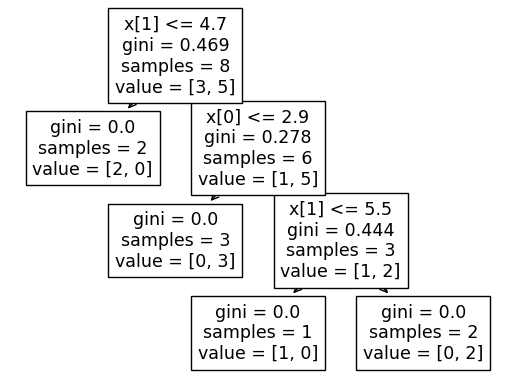

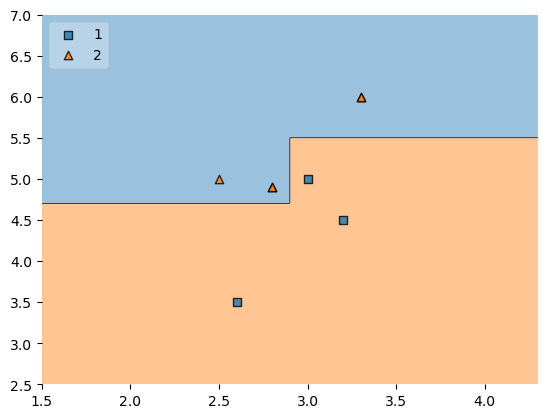

y_test :  [2 2 1 2 1]
y_pred :  [2 2 1 2 1]
accuracy score 1.0


In [180]:
# first tree
df_t = df_train.sample(8, replace=True)

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag1= evaluate(dt, X_train, y_train)

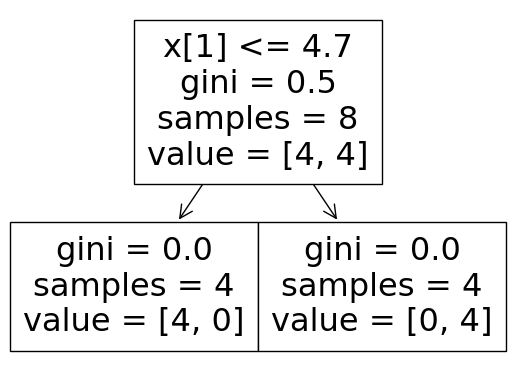

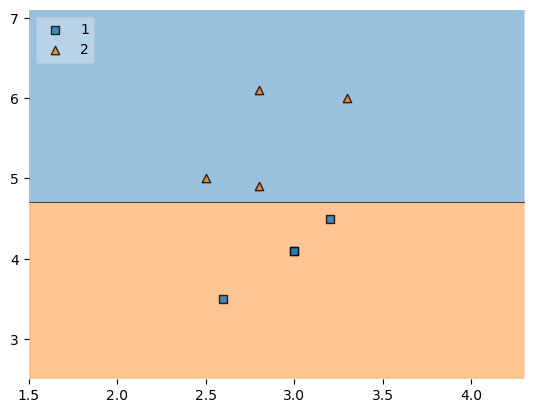

y_test :  [2 2 1 2 1]
y_pred :  [2 2 1 2 1]
accuracy score 1.0


In [181]:
# second tree
df_t = df_train.sample(8, replace=True)

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag1= evaluate(dt, X_train, y_train)

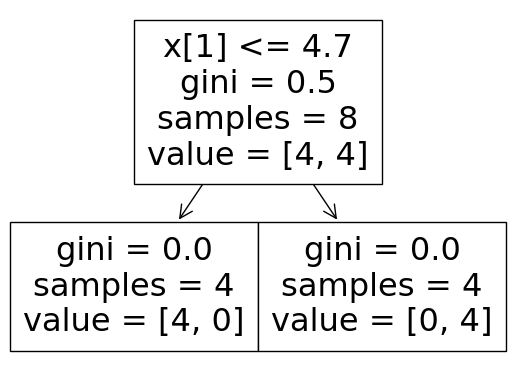

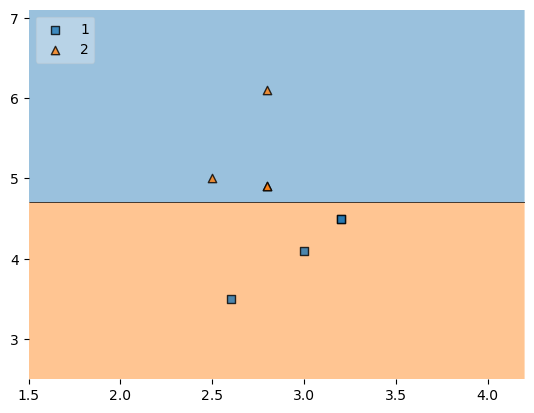

y_test :  [2 2 1 2 1]
y_pred :  [2 2 1 2 1]
accuracy score 1.0


In [182]:
# third tree
df_t = df_train.sample(8, replace=True)

X_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values

dt = DecisionTreeClassifier()
bag1= evaluate(dt, X_train, y_train)

In [185]:
#Aggrigation
print("Prediction 1", bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 2", bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3", bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

Prediction 1 [2]


NameError: name 'bag2' is not defined

## Partie Théorique : Ensembles d'Arbres
### Introduction :
Les ensembles d'arbres sont une stratégie puissante en apprentissage automatique, où plusieurs modèles d'arbres sont combinés pour améliorer la performance globale. Deux techniques couramment utilisées dans les ensembles d'arbres sont le Bagging (Bootstrap Aggregating) et le Pasting.

![Schéma Ensembles d'Arbres](assets/shema_bagging&plasting/Shema_Baggin.jpg)

## Bagging (Bootstrap Aggregating) :
Le Bagging est une technique qui vise à réduire la variance en agrégeant plusieurs modèles appris à partir de sous-ensembles de données générés par échantillonnage avec remplacement (bootstrap) du dataset d'origine. Voici les étapes générales du Bagging :

#### Idée Principale :
Utilise le Bootstrap Sampling pour créer des ensembles d'entraînement différents pour chaque modèle.

#### Fonctionnement :
Chaque modèle est formé indépendamment sur son propre ensemble d'entraînement, créé en tirant aléatoirement avec remplacement à partir du jeu de données original.

#### Avantages :
Réduit la variance, améliore la stabilité, et prévient le surajustement.

### Étape 1 : Bootstrap Sampling :
#### Théorie :
On crée plusieurs échantillons d'entraînement en tirant aléatoirement avec remplacement à partir du jeu de données original.

#### Exemple :
Supposons que nous ayons 150 exemples dans le dataset Iris. Nous créons plusieurs ensembles en tirant aléatoirement 150 exemples avec remplacement à chaque fois.

### Étape 2 : Construction des Arbres :
#### Théorie :
Pour chaque échantillon, on construit un arbre de décision, mais à chaque nœud, on ne considère qu'un sous-ensemble aléatoire des caractéristiques.

#### Exemple :
Quand on construit un arbre sur un sous-ensemble d'Iris, on pourrait, par exemple, considérer uniquement la longueur du sépale et la largeur du pétale pour chaque nœud.

### Étape 3 : Entraînement d'Arbres Indépendants :
#### Théorie :
Chaque arbre est entraîné de manière indépendante sur son propre ensemble d'entraînement généré par Bootstrap Sampling.

#### Exemple :
Pour chaque sous-ensemble d'Iris créé, un modèle d'arbre de décision est formé.

### Étape 4 : Agrégation des Prédictions :
#### Théorie :
Les prédictions de chaque arbre sont combinées par moyenne (régression) ou vote majoritaire (classification) pour obtenir la prédiction finale.

#### Exemple :
Si nous avons 5 modèles d'arbres, nous agrégeons leurs prédictions (par vote majoritaire, moyenne, etc.) pour obtenir la prédiction finale pour une observation Iris spécifique.

## Conclusion :
Le Bagging, en utilisant des modèles d'arbres de décision, offre une méthode robuste pour améliorer la performance des modèles et prévenir le surajustement, tout en utilisant le dataset Iris comme exemple spécifique. Chaque étape du processus contribue à la diversité des modèles, renforçant ainsi la capacité de généralisation de l'ensemble dans le contexte d'Iris.

## Pasting :
Pasting est une technique similaire au Bagging, mais au lieu d'utiliser un échantillonnage avec remplacement (bootstrap), elle utilise un échantillonnage sans remplacement pour créer différents ensembles d'entraînement pour chaque modèle. Voici les étapes générales du Pasting :

#### Idée Principale :
Utilise l'échantillonnage sans remplacement pour créer des ensembles d'entraînement différents pour chaque modèle.

#### Fonctionnement :
Chaque modèle est formé indépendamment sur son propre ensemble d'entraînement, créé en tirant aléatoirement sans remplacement à partir du jeu de données original.

#### Avantages :
Réduit la variance, améliore la stabilité, et prévient le surajustement.

### Étape 1 : Pasting (Échantillonnage sans remplacement) :
#### Théorie :
On crée plusieurs ensembles d'entraînement en tirant aléatoirement sans remplacement à partir du jeu de données original.

#### Exemple avec Iris :
Supposons que nous ayons 150 exemples dans le dataset Iris. Nous créons plusieurs ensembles en tirant aléatoirement, sans remplacement, 150 exemples à chaque fois.

### Étape 2 : Construction des Arbres :
#### Théorie :
Pour chaque échantillon, on construit un arbre de décision, mais à chaque nœud, on ne considère qu'un sous-ensemble aléatoire des caractéristiques.

#### Exemple :
Quand on construit un arbre sur un sous-ensemble d'Iris, on pourrait, par exemple, considérer uniquement la longueur du sépale et la largeur du pétale pour chaque nœud.

### Étape 3 : Entraînement d'Arbres Indépendants :
#### Théorie :
Chaque arbre est entraîné de manière indépendante sur son propre ensemble d'entraînement généré par Pasting.

#### Exemple avec Iris :
Pour chaque sous-ensemble d'Iris créé, un modèle d'arbre de décision est formé.

### Étape 4 : Agrégation des Prédictions :
#### Théorie :
Les prédictions de chaque arbre sont combinées par moyenne (régression) ou vote majoritaire (classification) pour obtenir la prédiction finale.

#### Exemple avec Iris :
Si nous avons 5 modèles d'arbres, nous agrégeons leurs prédictions (par vote majoritaire, moyenne, etc.) pour obtenir la prédiction finale pour une observation Iris spécifique.

## Conclusion :
Le Pasting, tout comme le Bagging, est une technique qui utilise des modèles d'arbres de décision pour créer un ensemble robuste et généralisable. En utilisant l'échantillonnage sans remplacement, Pasting offre une alternative au Bagging et peut être particulièrement utile lorsque le dataset est limité et que l'on souhaite éviter la répétition d'observations dans les ensembles d'entraînement. Chaque étape du processus contribue à la diversité des modèles, renforçant ainsi la capacité de généralisation de l'ensemble dans le contexte d'Iris.

#### Parlons maintenant du "Voting" (ou vote) dans le monde des arbres et des amis.

 

### Voting (Vote) :

 

Imagine que tu veux choisir quelle glace manger, et tu as trois amis qui ont chacun leur propre suggestion.

 

Ami 1 : Il suggère la glace à la vanille.

Ami 2 : Il suggère la glace au chocolat.

Ami 3 : Il suggère la glace à la fraise.

Maintenant, le "Voting" (ou vote) consiste simplement à choisir la suggestion qui obtient le plus de votes.

 

Si plus d'amis préfèrent la vanille, alors tu choisis la glace à la vanille.

Si plus d'amis préfèrent le chocolat, alors tu choisis la glace au chocolat.

Si plus d'amis préfèrent la fraise, alors tu choisis la glace à la fraise.

Le "Voting" dans les modèles d'arbres fonctionne de manière similaire. Imaginons que tu as plusieurs modèles d'arbres, chacun donnant sa propre prédiction.

 

Modèle 1 : Il prédit "Oui".

Modèle 2 : Il prédit "Non".

Modèle 3 : Il prédit "Oui".

Le "Voting" peut être "majoritaire" ou "à la moyenne".

 

#### Majoritaire : Si plus de modèles disent "Oui", alors la réponse finale est "Oui". Sinon, c'est "Non".

#### Moyenne : Si tu regardes les réponses chiffrées (par exemple, des probabilités), tu peux prendre la moyenne de ces chiffres pour obtenir une réponse finale.

C'est un peu comme écouter tes amis et suivre la suggestion qui obtient le plus de votes. Dans le monde des modèles d'arbres, le "Voting" te donne une décision finale en prenant en compte l'avis de plusieurs modèles. C'est une façon de rassembler les idées de différents arbres pour faire le meilleur choix possible.

### Hyperparamètres Importants :

#### Nombre de Modèles (n_estimators) : 
Le nombre total d'arbres dans l'ensemble.

#### Profondeur d'Arbre (max_depth) : 
La profondeur maximale de chaque arbre.

#### Nombre de Caractéristiques à Considérer (max_features) : 
Le nombre maximum de caractéristiques à considérer pour chaque division.

#### Critère de Division (criterion) :
Indique comment mesurer la qualité d'une division (ex. Gini pour la classification, MSE pour la régression).

Les hyperparamètres sont des paramètres externes au modèle qui influent sur le processus d'apprentissage mais qui ne sont pas appris par le modèle lui-même. Leur ajustement peut significativement affecter la performance du modèle. Voici quelques explications sur le fonctionnement des hyperparamètres, leur ordre de grandeur et comment les choisir :
1. Hyperparamètres Communs dans les Arbres de Décision et les Ensembles (Bagging, Pasting, Random Forest) :

    n_estimators : Il s'agit du nombre d'arbres dans l'ensemble. Il est important de trouver un équilibre, car augmenter le nombre d'arbres peut améliorer la performance jusqu'à un certain point, mais cela entraîne également un coût en termes de temps de calcul.

    max_depth : La profondeur maximale de chaque arbre. Cela contrôle la complexité du modèle. Une valeur trop élevée peut conduire à un surajustement, tandis qu'une valeur trop faible peut entraîner un sous-ajustement.

    min_samples_split : Le nombre minimum d'échantillons requis pour diviser un nœud. Une valeur plus élevée prévient le surajustement.

    min_samples_leaf : Le nombre minimum d'échantillons requis pour être dans une feuille. Comme min_samples_split, il aide à contrôler le surajustement.

    max_features : Le nombre maximal de fonctionnalités à considérer pour la division d'un nœud. Cela permet de rendre le modèle plus robuste en introduisant plus de diversité.

2. Ordre de Grandeur des Hyperparamètres :

    n_estimators : Typiquement dans la plage de 50 à quelques centaines.

    max_depth : Dépend de la taille du jeu de données et de la complexité de la relation à modéliser. Peut aller de quelques unités à plusieurs dizaines.

    min_samples_split et min_samples_leaf : Souvent dans la plage de 1 à 20.

    max_features : Peut être réglé sur "auto" (équivalent à sqrt(n_features)), "log2", ou un nombre fixe.

3. Choix des Hyperparamètres :

    Recherche Manuelle : Commencez avec une valeur arbitraire, évaluez la performance du modèle, et ajustez les hyperparamètres en conséquence.

    Recherche Grille (Grid Search) : Énumérez plusieurs combinaisons d'hyperparamètres et évaluez-les toutes. Sklearn propose la fonction GridSearchCV pour cela.

    Recherche Aléatoire (Random Search) : Échantillonnez aléatoirement à partir d'une distribution définie pour chaque hyperparamètre. Peut être plus efficace que la recherche grille.

    Optimisation Bayésienne : Utilise des méthodes d'optimisation bayésienne pour explorer de manière plus intelligente l'espace des hyperparamètres.

4. Validation Croisée (Cross-Validation) :

    Toujours utiliser la validation croisée pour évaluer la performance du modèle avec différentes combinaisons d'hyperparamètres.

    Cela aide à éviter le surajustement aux données d'entraînement.

5. Autres Conseils :

    Visualisation : Utilisez des graphiques pour comprendre comment la performance du modèle change avec différents hyperparamètres.

    Compréhension du Problème : La connaissance du domaine peut vous aider à choisir des valeurs initiales raisonnables pour les hyperparamètres.

    Ressources en Calcul : Tenez compte du coût en termes de ressources de calcul lors du choix des valeurs pour n_estimators et d'autres hyperparamètres.

En résumé, l'ajustement des hyperparamètres est un processus itératif et dépendant du problème. Il est essentiel de comprendre le comportement de chaque hyperparamètre et de les ajuster en fonction de la complexité du modèle et des caractéristiques du jeu de données.


    Arbres de Décision :
        Gestion Naturelle : Les arbres de décision peuvent gérer naturellement les valeurs manquantes. Lors de la construction d'un arbre, si un attribut avec une valeur manquante est choisi comme attribut de séparation à un nœud, les exemples manquants peuvent être dirigés vers l'un des sous-arbres en fonction d'autres attributs disponibles.
        Scikit-learn : Dans la bibliothèque scikit-learn, les arbres de décision gèrent naturellement les valeurs manquantes.

    Autres Modèles :
        Imputation Préalable : Avant d'appliquer le bagging ou le pasting, vous pourriez effectuer une imputation des valeurs manquantes dans votre ensemble de données. Cela signifie remplacer les valeurs manquantes par des valeurs estimées, telles que la moyenne, la médiane ou d'autres méthodes d'imputation.
        Ensemble de Données Complet : Vous pouvez également choisir de ne travailler qu'avec des exemples complets lors de la création des échantillons bootstrap. Cela signifie que si une observation a une valeur manquante, elle ne sera pas incluse dans l'échantillon bootstrap spécifique utilisé pour entraîner un modèle individuel.

    Bibliothèques Spécifiques :
        XGBoost, LightGBM, etc. : Certaines bibliothèques populaires pour les arbres de décision, telles que XGBoost et LightGBM, ont des mécanismes intégrés pour gérer les valeurs manquantes de manière efficace.

Wisdom of the crowd 
VotingClassifier & VotingRegressor
BagginClassifier & BaginRegressor


Accuracy

les limite de l'accuracy : classe imbalance dummyclassifier de sklearn 
matrice de confusion : 
recall = tp / (tp +fn)
precision = tp / (tp +fp)
f1 score = 2*(presicion * recall)/(precision + recall) = 2tp/ (

)
spécificité = tn / fp+tn